In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from g_ml.utilidades.processamento import treino_teste
from g_ml.utilidades.processamento import escala_padrao

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)


### SVM e comitês de modelos 

In [2]:
# carregamentos dos dados
bostonbin = np.genfromtxt('../data/bostonbin.csv', delimiter=',')

In [3]:
X = bostonbin[:, 0:17]
y = bostonbin[:, -1]

In [4]:
# Separação em treino e teste
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.3)

In [5]:
# padronização da escala
escalador_X = escala_padrao()

escalador_X.fit(X_treino)

X_treino_escalado = escalador_X.transform(X_treino)
X_teste_escalado = escalador_X.transform(X_teste)

## Aplicação de Máquinas de Vetores de Suporte (SVMs) p/ Classificação

In [6]:
# Grade de busca para algoritmo SVM
C = [2**-5,2**-3,2**-1,2,2**2,2**4,2**6,2**8,2**10,2**12,2**14,2**16]
gamma = [2**-15,2**-13,2**-11,2**-9,2**-7,2**-5,2**-3,2**-1,2,2**2,2**4]

grade_svm = {
    'C':C,
    'gamma': gamma
}

In [7]:
svm = SVC(kernel='rbf')

In [8]:
gscv = GridSearchCV(svm, grade_svm, cv=10)
gscv.fit(X_treino_escalado, y_treino)
y_pred_svm = gscv.best_estimator_.predict(X_teste_escalado)

In [9]:
gscv.best_params_

{'C': 4, 'gamma': 0.03125}

**Avaliação no Treino**

In [10]:
y_pred_svm_treino = gscv.best_estimator_.predict(X_treino_escalado)

acc = accuracy_score(y_treino, y_pred_svm_treino)
precisao = precision_score(y_treino, y_pred_svm_treino)
revocacao = recall_score(y_treino, y_pred_svm_treino)
f1 = f1_score(y_treino, y_pred_svm_treino)

print("A acurácia do modelo é de: {} ".format(acc))
print("A precisão do modelo é de: {}".format(precisao))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))

A acurácia do modelo é de: 0.9154929577464789 
A precisão do modelo é de: 0.9174757281553398
A revocacão do modelo é de: 0.9356435643564357
O f1_score do modelo é de: 0.926470588235294


**Avaliação no Teste**

In [11]:
acc = accuracy_score(y_teste, y_pred_svm)
precisao = precision_score(y_teste, y_pred_svm)
revocacao = recall_score(y_teste, y_pred_svm)
f1 = f1_score(y_teste, y_pred_svm)

print("A acurácia do modelo é de: {} ".format(acc))
print("A precisão do modelo é de: {}".format(precisao))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))

A acurácia do modelo é de: 0.8675496688741722 
A precisão do modelo é de: 0.8860759493670886
A revocacão do modelo é de: 0.8641975308641975
O f1_score do modelo é de: 0.8749999999999999


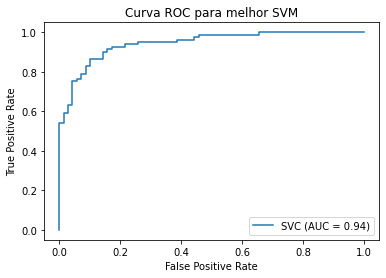

In [12]:
plot_roc_curve(gscv.best_estimator_, X_teste_escalado, y_teste)
plt.title("Curva ROC para melhor SVM")
plt.show()

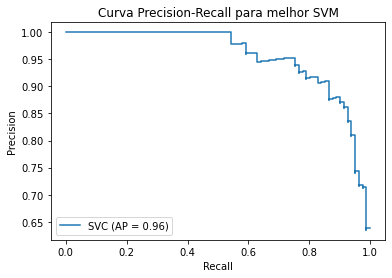

In [13]:
plot_precision_recall_curve(gscv.best_estimator_, X_teste_escalado, y_teste)
plt.title("Curva Precision-Recall para melhor SVM")
plt.show()

## Aplicação de Florestas Aleatórias p/ Classificação

In [14]:
classificadores_base = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
profundidade_max = [2,4,6,8,None]

grade_rfc = {
    'n_estimators':classificadores_base,
    'max_depth': profundidade_max
}

In [15]:
rfc  = RandomForestClassifier()

In [16]:
gscv_rfc = GridSearchCV(rfc, grade_rfc, cv=10)
gscv_rfc.fit(X_treino, y_treino)
y_pred_rfc = gscv_rfc.best_estimator_.predict(X_teste)

In [17]:
gscv_rfc.best_params_

{'max_depth': None, 'n_estimators': 10}

**Avaliação no Treino**

In [18]:
y_pred_rfc_treino = gscv_rfc.best_estimator_.predict(X_treino)

acc = accuracy_score(y_treino, y_pred_rfc_treino)
precisao = precision_score(y_treino, y_pred_rfc_treino)
revocacao = recall_score(y_treino, y_pred_rfc_treino)
f1 = f1_score(y_treino, y_pred_rfc_treino)

print("A acurácia do modelo é de: {} ".format(acc))
print("A precisão do modelo é de: {}".format(precisao))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))

A acurácia do modelo é de: 0.9859154929577465 
A precisão do modelo é de: 0.9949748743718593
A revocacão do modelo é de: 0.9801980198019802
O f1_score do modelo é de: 0.9875311720698253


**Avaliação no Teste**

In [19]:
y_pred_rfc_teste = gscv_rfc.best_estimator_.predict(X_teste)

acc = accuracy_score(y_teste, y_pred_rfc_teste)
precisao = precision_score(y_teste, y_pred_rfc_teste)
revocacao = recall_score(y_teste, y_pred_rfc_teste)
f1 = f1_score(y_teste, y_pred_rfc_teste)

print("A acurácia do modelo é de: {} ".format(acc))
print("A precisão do modelo é de: {}".format(precisao))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))

A acurácia do modelo é de: 0.8675496688741722 
A precisão do modelo é de: 0.9178082191780822
A revocacão do modelo é de: 0.8271604938271605
O f1_score do modelo é de: 0.8701298701298701


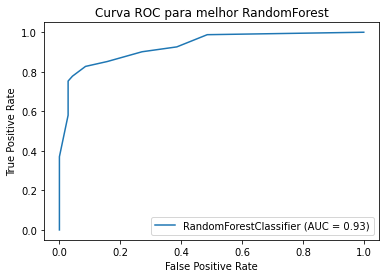

In [20]:
plot_roc_curve(gscv_rfc.best_estimator_, X_teste, y_teste)
plt.title("Curva ROC para melhor RandomForest")
plt.show()

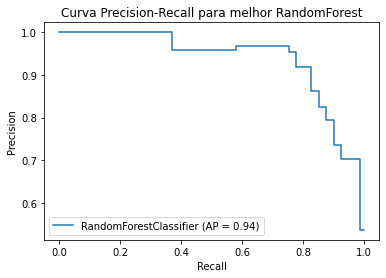

In [21]:
plot_precision_recall_curve(gscv_rfc.best_estimator_, X_teste, y_teste)
plt.title("Curva Precision-Recall para melhor RandomForest")
plt.show()

### Resumo
**Modelo SVM**
* Acurácia: 0.867
* Precisão: 0.886
* Revocacão: 0.864
* f1_score: 0.870

**Modelo RandomForest**
* Acurácia: 0.867
* Precisão: 0.917
* Revocacão: 0.827
* f1_score: 0.874
